In [1]:
import numpy as np
import cv2
import os
# Added because of this error
# Error #15: Initializing libiomp5.dylib, but found libomp.dylib already initialized.
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ['CUDA_VISIBLE_DEVICES'] = 'True'
# =============================================
import random
import matplotlib.pyplot as plt
import pickle
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.layers import Activation, Dense, Flatten,Conv2D, MaxPool2D


In [2]:
DIRECTORY = "/Users/macbookpro/Documents/AI/datasets/dogs-vs-cats/train"
TEST_DIRECTORY = "/Users/macbookpro/Documents/AI/datasets/dogs-vs-cats/test"
# 0 is cat, 1 is dog
CATEGORIES = ['cat', 'dog']

In [3]:
IMG_SIZE = 100
# for train data
data = []

In [4]:
for img in os.listdir(DIRECTORY):
    img_path = os.path.join(DIRECTORY, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))

    if img.find("dog") > -1:
        data.append([img_arr, 1])
    elif img.find("cat") > -1:
        data.append([img_arr, 0])
#     plt.imshow(img_arr)

In [29]:
# for test data
test_samples = []

for img in os.listdir(TEST_DIRECTORY):
    img_path = os.path.join(TEST_DIRECTORY, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
    test_samples.append(img_arr)
    

In [30]:
test_samples = np.array(test_samples)
test_samples = test_samples/255

In [5]:
data[1000][1]

0

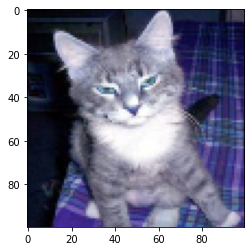

In [6]:
plt.imshow(data[1000][0])

In [7]:
len(data)

25000

In [8]:
random.shuffle(data)

In [9]:
train_samples = []
train_labels = []

In [10]:
for features, labels in data:
    train_samples.append(features)
    train_labels.append(labels)

In [11]:
train_samples = np.array(train_samples)
train_labels = np.array(train_labels)

In [12]:
# save to continue later
pickle.dump(train_samples, open('train_samples.pkl', 'wb'))
pickle.dump(train_labels, open('train_labels.pkl', 'wb'))

In [13]:
# load saved data
train_samples = pickle.load(open('train_samples.pkl', 'rb'))
train_labels = pickle.load(open('train_labels.pkl', 'rb'))

In [14]:
train_labels

array([1, 1, 1, ..., 0, 0, 1])

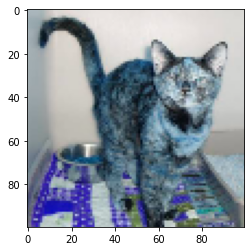

In [15]:
plt.imshow(train_samples[1701])

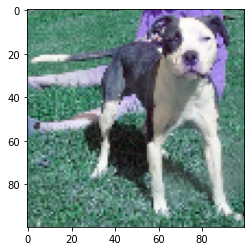

In [16]:
plt.imshow(train_samples[2841])

In [17]:
# feature scaling
train_samples = train_samples/255
train_samples

array([[[[0.05490196, 0.30196078, 0.30196078],
         [0.01568627, 0.24705882, 0.24705882],
         [0.29411765, 0.50196078, 0.50196078],
         ...,
         [0.17647059, 0.52941176, 0.52941176],
         [0.13333333, 0.4627451 , 0.48235294],
         [0.01176471, 0.28235294, 0.30980392]],

        [[0.03921569, 0.23529412, 0.24313725],
         [0.01960784, 0.21176471, 0.21568627],
         [0.20392157, 0.37254902, 0.38039216],
         ...,
         [0.25882353, 0.62745098, 0.60784314],
         [0.33333333, 0.65882353, 0.66666667],
         [0.12156863, 0.42352941, 0.44313725]],

        [[0.09803922, 0.23921569, 0.24705882],
         [0.07843137, 0.21568627, 0.22745098],
         [0.34901961, 0.4627451 , 0.4745098 ],
         ...,
         [0.31372549, 0.67058824, 0.63529412],
         [0.1254902 , 0.41960784, 0.40784314],
         [0.        , 0.15686275, 0.16078431]],

        ...,

        [[0.31372549, 0.4       , 0.50980392],
         [0.31764706, 0.41176471, 0.51372549]

In [18]:
train_samples.shape

(25000, 100, 100, 3)

In [19]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding="same", input_shape=train_samples.shape[1:]),
    MaxPool2D(pool_size=(3,3),strides=2),
    
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding="same"),
    MaxPool2D(pool_size=(3,3),strides=2),
    
    Flatten(),
    
    Dense(units=128, activation='relu'),
    Dense(units=200, activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=60, activation='relu'),
    Dense(units=12, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 49, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 200)               2

In [21]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
train_number = 2

In [25]:
NAME = f'cat-dog-pred-T-no-{train_number}'
tensorboard = TensorBoard(log_dir=f'logs/{NAME}/')
train_number = train_number + 1

model.fit(x=train_samples, y=train_labels, validation_split=0.1,\
          epochs=5, batch_size=2000, shuffle=True, callbacks=[tensorboard])


Train on 22500 samples, validate on 2500 samples
Epoch 1/5
22500/22500 [==============================] - 1877s 83ms/sample - loss: 0.2805 - accuracy: 0.8817 - val_loss: 0.4492 - val_accuracy: 0.8116
Epoch 2/5
22500/22500 [==============================] - 1980s 88ms/sample - loss: 0.2260 - accuracy: 0.9101 - val_loss: 0.4563 - val_accuracy: 0.8176
Epoch 3/5
22500/22500 [==============================] - 2622s 117ms/sample - loss: 0.2561 - accuracy: 0.8929 - val_loss: 0.4633 - val_accuracy: 0.8060
Epoch 4/5
22500/22500 [==============================] - 2060s 92ms/sample - loss: 0.2192 - accuracy: 0.9104 - val_loss: 0.5154 - val_accuracy: 0.8032
Epoch 5/5
22500/22500 [==============================] - 1923s 85ms/sample - loss: 0.1789 - accuracy: 0.9300 - val_loss: 0.5092 - val_accuracy: 0.8008


In [24]:
# to view tensorboard
# open terminal
# cd to project directory and
# run command:  tensorboard --logdir=logs

In [27]:
# checks first to see if  file exists already
# if not, the model is saved to disk

if os.path.isfile('/Users/macbookpro/Documents/AI/space/dog-cat-CNN/dog_cat_model.h5') is False:
    model.save('/Users/macbookpro/Documents/AI/space/dog-cat-CNN/dog_cat_model.h5')

In [31]:
predictions = model.predict(x=test_samples, batch_size=1000)

In [32]:
for i in predictions:
    print(i)

[0.8209214  0.17907858]
[0.7186465 0.2813534]
[0.00281857 0.9971814 ]
[3.6011788e-04 9.9963987e-01]
[0.9512467  0.04875333]
[0.01131726 0.9886827 ]
[0.00525655 0.99474347]
[0.06356081 0.93643916]
[0.9807407  0.01925926]
[0.9908002  0.00919979]
[0.696906   0.30309394]
[0.9938869  0.00611316]
[0.65429676 0.34570318]
[0.20732497 0.7926751 ]
[0.18231525 0.81768477]
[0.11680356 0.8831965 ]
[0.02030478 0.9796952 ]
[0.8862936  0.11370645]
[0.03791717 0.96208286]
[0.05409003 0.94591004]
[0.9980362 0.0019638]
[9.9976057e-01 2.3946211e-04]
[0.214021 0.785979]
[0.8998489  0.10015115]
[0.9521557 0.0478443]
[0.33778444 0.66221553]
[0.98379946 0.01620052]
[0.001296   0.99870396]
[0.10136583 0.8986342 ]
[0.98476934 0.01523067]
[0.927569   0.07243105]
[0.7527057  0.24729434]
[0.02278879 0.97721124]
[0.41359678 0.5864032 ]
[0.00606336 0.9939367 ]
[0.85135186 0.14864814]
[2.7750497e-04 9.9972242e-01]
[0.527928   0.47207204]
[0.5623369  0.43766308]
[0.0345944 0.9654056]
[0.7243784  0.27562153]
[0.0063337

[0.84564275 0.15435734]
[0.02297239 0.97702765]
[0.9744446  0.02555534]
[0.0446767  0.95532334]
[0.04167553 0.9583245 ]
[2.2351352e-04 9.9977654e-01]
[0.00112062 0.9988794 ]
[0.01601571 0.9839843 ]
[0.3033397  0.69666034]
[9.995596e-01 4.404622e-04]
[1.18837146e-04 9.99881148e-01]
[0.9604142  0.03958585]
[0.8100569  0.18994308]
[3.7612964e-04 9.9962389e-01]
[0.00414562 0.9958544 ]
[0.12152074 0.8784793 ]
[0.00777549 0.99222445]
[0.90215135 0.09784872]
[0.25633854 0.7436614 ]
[0.01002839 0.98997164]
[0.99735427 0.00264579]
[0.95697343 0.04302657]
[0.60386115 0.39613882]
[9.453457e-04 9.990546e-01]
[4.8241980e-04 9.9951756e-01]
[0.8859858 0.1140142]
[0.99827313 0.00172684]
[0.00607214 0.99392784]
[0.00945576 0.9905442 ]
[0.9927597  0.00724034]
[0.09407303 0.90592694]
[0.9497198  0.05028024]
[0.00136659 0.9986333 ]
[0.9606338  0.03936621]
[0.98359966 0.0164004 ]
[0.9460201  0.05397996]
[9.9958616e-01 4.1384672e-04]
[0.02001696 0.9799831 ]
[0.2291941  0.77080584]
[0.00465781 0.99534225]
[0

[0.00346297 0.9965371 ]
[0.87977374 0.12022629]
[0.33265647 0.6673435 ]
[0.00287959 0.9971205 ]
[0.00152392 0.9984761 ]
[0.9358059 0.0641941]
[0.08502249 0.91497755]
[0.8118514  0.18814865]
[0.00171422 0.9982857 ]
[9.9954259e-01 4.5739024e-04]
[0.9976368  0.00236319]
[9.9947256e-01 5.2745605e-04]
[2.4592035e-04 9.9975413e-01]
[0.8035263  0.19647373]
[0.99839383 0.00160616]
[0.3243613  0.67563874]
[0.06313785 0.9368621 ]
[0.9757228  0.02427714]
[0.9874479 0.0125521]
[0.91793305 0.08206698]
[0.7348123  0.26518768]
[0.9501089  0.04989119]
[0.00534291 0.99465716]
[0.99522877 0.00477119]
[0.99052656 0.00947348]
[0.9958301  0.00416987]
[0.00800798 0.99199206]
[0.09229202 0.90770805]
[0.9974788  0.00252123]
[0.76724744 0.23275255]
[0.9924959  0.00750407]
[0.20822282 0.7917772 ]
[9.9979550e-01 2.0453615e-04]
[0.27843568 0.7215643 ]
[7.334487e-05 9.999267e-01]
[0.94015676 0.05984318]
[0.86652267 0.13347733]
[4.2383681e-04 9.9957615e-01]
[0.11288591 0.88711405]
[0.3509309 0.6490691]
[0.00903866 

[9.9993527e-01 6.4761574e-05]
[0.01991503 0.98008496]
[0.6049224  0.39507753]
[0.49650928 0.50349075]
[0.0038615 0.9961385]
[0.9696447  0.03035522]
[0.9940639  0.00593608]
[0.983584   0.01641598]
[0.00180726 0.9981927 ]
[0.8986981  0.10130194]
[4.5791217e-06 9.9999547e-01]
[0.18618108 0.8138189 ]
[0.90045464 0.09954538]
[0.5410299  0.45897007]
[9.9915171e-01 8.4823696e-04]
[0.9955266 0.0044734]
[0.98554116 0.01445887]
[0.00870476 0.9912952 ]
[0.05520167 0.9447983 ]
[0.2306999 0.7693001]
[0.00927172 0.99072826]
[0.6765711  0.32342887]
[0.00123024 0.9987697 ]
[0.002796   0.99720407]
[0.9939732  0.00602675]
[5.0410576e-04 9.9949586e-01]
[0.00256436 0.9974356 ]
[0.87069744 0.12930256]
[0.9980141  0.00198593]
[0.2978601 0.7021399]
[0.9818345  0.01816556]
[0.09344219 0.90655786]
[0.08509359 0.91490644]
[0.43673584 0.5632641 ]
[0.00111345 0.9988865 ]
[0.9499877  0.05001226]
[6.325575e-04 9.993674e-01]
[0.99610436 0.00389568]
[0.9751498  0.02485023]
[0.5315969 0.4684031]
[0.02879429 0.9712058 

[0.03763401 0.9623659 ]
[0.04262308 0.9573769 ]
[0.9581129  0.04188715]
[1.5443284e-04 9.9984550e-01]
[0.9325211 0.0674789]
[0.1930371 0.8069629]
[0.9859174  0.01408265]
[0.01297466 0.9870253 ]
[0.01299428 0.9870057 ]
[0.99690455 0.00309547]
[0.04814459 0.95185536]
[0.3727256  0.62727433]
[0.6761291  0.32387087]
[0.9545039  0.04549605]
[0.99680674 0.00319327]
[0.01137643 0.9886235 ]
[0.9806184  0.01938155]
[0.44804072 0.5519592 ]
[0.04184269 0.95815736]
[0.22525112 0.7747489 ]
[0.13779154 0.8622085 ]
[0.18088521 0.81911486]
[0.296049   0.70395094]
[0.38183433 0.61816573]
[0.03661476 0.96338516]
[0.13220985 0.86779016]
[0.9342917  0.06570826]
[0.00188711 0.9981129 ]
[0.12089422 0.87910587]
[0.93726796 0.06273205]
[0.9349483  0.06505169]
[6.6930777e-04 9.9933076e-01]
[9.9966872e-01 3.3129661e-04]
[0.96493185 0.03506818]
[0.9981173  0.00188267]
[0.73852897 0.26147097]
[0.00147259 0.9985274 ]
[0.03477575 0.9652243 ]
[0.8322503  0.16774975]
[0.09634132 0.9036587 ]
[0.01565946 0.98434055]
[0

[5.4211396e-05 9.9994576e-01]
[0.05954558 0.9404544 ]
[0.35020342 0.6497966 ]
[0.04810115 0.9518989 ]
[0.9454013  0.05459876]
[0.02742048 0.9725795 ]
[2.766615e-04 9.997234e-01]
[4.586800e-07 9.999995e-01]
[0.22015484 0.7798452 ]
[0.00551395 0.99448603]
[0.38657415 0.6134259 ]
[0.9950364  0.00496358]
[0.9525961  0.04740388]
[0.00730234 0.99269766]
[0.99384886 0.00615121]
[0.7905383 0.2094617]
[0.3080219 0.6919781]
[0.8472119  0.15278809]
[0.9986206  0.00137935]
[1.7326681e-06 9.9999821e-01]
[0.20618904 0.793811  ]
[0.97908634 0.02091365]
[9.997415e-01 2.584449e-04]
[0.9935289  0.00647112]
[0.9802198 0.0197802]
[0.17732406 0.82267594]
[0.7396351 0.2603648]
[0.9851682  0.01483174]
[0.9981974  0.00180267]
[0.98992705 0.01007301]
[0.89364    0.10636001]
[0.9865145  0.01348545]
[0.2178002 0.7821998]
[9.9960846e-01 3.9159428e-04]
[1.1033127e-04 9.9988961e-01]
[0.9489844  0.05101562]
[0.4293876 0.5706124]
[0.46325305 0.5367469 ]
[0.23422214 0.7657778 ]
[0.09459017 0.9054098 ]
[0.02755782 0.97

[0.99217105 0.00782889]
[0.98586094 0.01413899]
[0.00103124 0.9989687 ]
[0.1751858  0.82481426]
[0.9736092  0.02639076]
[0.8867967  0.11320336]
[0.00296613 0.99703383]
[0.6187032 0.3812968]
[0.9815532  0.01844677]
[0.5200737  0.47992626]
[5.5167935e-04 9.9944836e-01]
[0.7933298  0.20667028]
[3.6894894e-04 9.9963105e-01]
[0.2968575 0.7031424]
[0.9923465  0.00765347]
[0.19020794 0.80979216]
[0.9787483  0.02125175]
[0.11679152 0.8832085 ]
[0.1024799 0.8975201]
[0.03034324 0.96965677]
[0.00651493 0.99348503]
[0.97576535 0.02423467]
[0.91411906 0.08588095]
[3.1492847e-04 9.9968505e-01]
[0.00278015 0.9972198 ]
[0.95112884 0.04887114]
[9.9985123e-01 1.4877832e-04]
[0.16364351 0.8363565 ]
[0.97251296 0.02748699]
[0.9650711  0.03492891]
[0.0212238  0.97877616]
[0.34056187 0.6594381 ]
[0.9895096  0.01049037]
[0.0292805  0.97071946]
[0.00145687 0.99854314]
[0.0038569  0.99614316]
[0.00742312 0.9925769 ]
[0.944415   0.05558501]
[0.63038206 0.36961788]
[0.9427456  0.05725438]
[0.998716   0.00128401

[0.11234644 0.8876535 ]
[0.1721187  0.82788134]
[0.33841184 0.6615882 ]
[0.00288201 0.997118  ]
[0.9987974  0.00120255]
[0.9956691 0.0043309]
[0.0614627 0.9385373]
[0.9585746  0.04142535]
[0.91063726 0.08936275]
[0.81481177 0.18518822]
[0.00124616 0.9987538 ]
[0.9918983  0.00810168]
[0.9092634  0.09073669]
[0.00189102 0.998109  ]
[0.03128242 0.9687176 ]
[0.01385597 0.98614407]
[0.00511088 0.9948892 ]
[0.8551194  0.14488067]
[0.00838787 0.9916121 ]
[0.32843456 0.6715655 ]
[9.9962378e-01 3.7622932e-04]
[0.95116085 0.04883912]
[0.0015398 0.9984602]
[0.32740977 0.67259026]
[0.91491616 0.08508386]
[0.90698195 0.09301802]
[0.0797796 0.9202204]
[0.67120576 0.3287942 ]
[0.56200963 0.4379904 ]
[0.01001521 0.98998475]
[0.84538424 0.15461577]
[7.8407218e-05 9.9992156e-01]
[0.6455753  0.35442477]
[0.16913444 0.83086556]
[0.00144354 0.99855644]
[0.88672596 0.1132741 ]
[0.72045714 0.27954286]
[0.00981399 0.990186  ]
[0.6665     0.33350003]
[0.0018179 0.9981822]
[0.69695014 0.30304992]
[0.7228127  0.

[0.04643463 0.95356536]
[0.7133765 0.2866235]
[0.6783672  0.32163283]
[0.06163716 0.93836284]
[0.05410773 0.94589233]
[6.6789857e-04 9.9933213e-01]
[1.5330956e-04 9.9984670e-01]
[3.5164339e-06 9.9999654e-01]
[9.990102e-01 9.897706e-04]
[0.9408284  0.05917167]
[0.988519 0.011481]
[0.11104304 0.8889569 ]
[0.27476445 0.7252355 ]
[0.9790419  0.02095806]
[0.96055377 0.03944628]
[0.86117554 0.13882451]
[0.01595869 0.98404133]
[0.22285302 0.77714705]
[9.9997497e-01 2.4993575e-05]
[0.8833669  0.11663318]
[0.8687879  0.13121216]
[0.85495955 0.1450405 ]
[0.15795162 0.8420484 ]
[1.6758624e-04 9.9983239e-01]
[0.9987834  0.00121664]
[0.02494441 0.9750556 ]
[0.06522278 0.93477726]
[0.8690145  0.13098557]
[0.2771319  0.72286814]
[0.49102595 0.5089741 ]
[0.36607203 0.63392794]
[0.8796853  0.12031478]
[0.00881222 0.9911878 ]
[0.475215   0.52478504]
[0.9763496  0.02365039]
[0.99070895 0.00929104]
[9.9914443e-01 8.5559883e-04]
[0.93016994 0.06983014]
[4.4436552e-04 9.9955565e-01]
[9.9954778e-01 4.5216645

[0.74031353 0.25968644]
[0.69268066 0.3073193 ]
[0.46213076 0.5378692 ]
[0.04060392 0.95939606]
[0.01314712 0.98685294]
[0.98001766 0.01998234]
[0.86838067 0.13161933]
[0.9862904  0.01370962]
[9.991435e-01 8.564487e-04]
[0.01945993 0.9805401 ]
[0.05084603 0.949154  ]
[0.96776855 0.03223149]
[0.00636894 0.99363106]
[0.16060147 0.83939856]
[0.20121264 0.79878736]
[0.85923266 0.14076738]
[0.9887866  0.01121347]
[0.2973981 0.7026019]
[0.9949104  0.00508962]
[0.02074436 0.9792556 ]
[2.6468816e-04 9.9973530e-01]
[0.7980723  0.20192778]
[3.9018574e-04 9.9960989e-01]
[7.127530e-04 9.992873e-01]
[0.7239103 0.2760897]
[0.8420763  0.15792368]
[0.00121904 0.9987809 ]
[0.76524246 0.2347576 ]
[0.03026984 0.96973014]
[0.00831862 0.9916814 ]
[0.98953736 0.01046261]
[0.840504   0.15949595]
[0.2998132 0.7001868]
[0.23689929 0.76310074]
[0.9814361  0.01856395]
[0.01470216 0.98529786]
[0.03081962 0.9691804 ]
[0.5864522  0.41354784]
[0.5713245  0.42867547]
[9.9924242e-01 7.5761817e-04]
[0.99155104 0.008448

[0.9603734  0.03962659]
[0.96831775 0.03168227]
[0.00165977 0.99834025]
[0.98811954 0.01188047]
[0.9236281  0.07637195]
[0.49811688 0.50188315]
[0.73528916 0.26471084]
[0.03620379 0.96379614]
[0.94256514 0.05743493]
[0.04284423 0.95715576]
[0.6529452  0.34705475]
[0.07750316 0.92249686]
[0.9176255  0.08237454]
[0.01827276 0.98172724]
[0.60663223 0.39336774]
[0.01605471 0.9839453 ]
[0.9897775  0.01022242]
[0.92501396 0.07498614]
[0.98615533 0.01384472]
[0.00780473 0.99219525]
[1.5706706e-05 9.9998426e-01]
[0.08326697 0.9167331 ]
[0.2537438 0.7462562]
[0.8460819  0.15391812]
[0.9387802  0.06121989]
[0.8941205  0.10587955]
[0.00297273 0.99702734]
[0.00894169 0.99105835]
[0.06468789 0.93531215]
[0.00461901 0.995381  ]
[9.9940574e-01 5.9427536e-04]
[0.89997953 0.10002046]
[0.00799741 0.9920026 ]
[4.2577190e-04 9.9957424e-01]
[9.9966252e-01 3.3745813e-04]
[0.7907886  0.20921148]
[0.26284727 0.7371527 ]
[0.17500696 0.824993  ]
[0.03217994 0.96782   ]
[0.05406743 0.9459326 ]
[5.289257e-04 9.99

[0.43426073 0.5657393 ]
[0.00106434 0.99893564]
[0.6343997 0.3656003]
[0.7438479  0.25615203]
[0.00262224 0.99737775]
[0.08684609 0.91315395]
[0.01885269 0.9811473 ]
[0.00191133 0.99808866]
[0.9904214  0.00957856]
[0.94402057 0.05597951]
[0.9499659  0.05003419]
[0.58860576 0.4113942 ]
[9.9992430e-01 7.5695854e-05]
[0.99884295 0.00115702]
[0.00822176 0.99177825]
[0.945346   0.05465399]
[0.02060599 0.9793941 ]
[0.05852443 0.9414755 ]
[0.8084337  0.19156624]
[0.76472455 0.23527545]
[2.8082140e-05 9.9997187e-01]
[0.45373687 0.54626304]
[0.7933489 0.2066512]
[0.6532225  0.34677753]
[0.00100327 0.9989968 ]
[0.9902581  0.00974187]
[0.01032817 0.9896718 ]
[0.00118196 0.998818  ]
[3.635329e-04 9.996364e-01]
[0.00758408 0.9924159 ]
[0.07697095 0.92302907]
[0.19503547 0.8049645 ]
[9.998503e-01 1.496489e-04]
[0.00280798 0.9971921 ]
[0.9425751  0.05742492]
[0.3149261 0.6850739]
[0.97387755 0.02612244]
[0.99706596 0.00293406]
[0.56536037 0.4346397 ]
[0.00381238 0.9961876 ]
[0.00630996 0.99369   ]
[0

[0.01327308 0.986727  ]
[0.18448961 0.8155104 ]
[9.1937237e-04 9.9908066e-01]
[0.98010343 0.01989658]
[7.7404955e-04 9.9922597e-01]
[0.3464606  0.65353936]
[0.17757204 0.822428  ]
[0.01824109 0.98175895]
[0.00468257 0.99531746]
[0.44592157 0.5540784 ]
[0.8052348  0.19476517]
[0.72460854 0.27539152]
[0.9986927  0.00130736]
[1.5146790e-05 9.9998486e-01]
[0.96871793 0.03128213]
[0.9987112  0.00128874]
[0.00962367 0.9903763 ]
[0.47065014 0.5293499 ]
[0.9907357  0.00926428]
[0.92917144 0.07082861]
[0.97799325 0.02200671]
[0.11633772 0.88366234]
[0.9930789  0.00692105]
[0.00217723 0.99782276]
[0.87273043 0.1272696 ]
[0.5970427  0.40295735]
[0.02254427 0.97745574]
[0.6562115  0.34378844]
[8.852386e-04 9.991147e-01]
[0.12447879 0.87552124]
[0.1539977  0.84600234]
[0.01916896 0.98083097]
[0.09323119 0.9067688 ]
[0.0395638  0.96043617]
[0.11338179 0.88661826]
[0.07741451 0.92258555]
[0.99757653 0.00242353]
[0.00145543 0.9985446 ]
[0.9636187  0.03638128]
[0.82619566 0.17380433]
[0.13487118 0.8651

[0.00401158 0.9959884 ]
[0.29640406 0.70359594]
[0.12711096 0.8728891 ]
[0.00496684 0.99503314]
[0.00295031 0.9970497 ]
[0.8303701  0.16962987]
[0.78832155 0.21167848]
[0.3145397  0.68546027]
[0.00336667 0.99663335]
[0.99509263 0.00490739]
[0.9907425  0.00925743]
[0.97537905 0.02462097]
[0.06913308 0.93086696]
[0.00552795 0.994472  ]
[0.05918376 0.9408162 ]
[0.91122025 0.08877975]
[0.94654614 0.05345385]
[0.60108966 0.39891037]
[9.99894500e-01 1.05444225e-04]
[0.05490679 0.94509315]
[0.99387944 0.00612055]
[0.993375   0.00662501]
[0.1375404 0.8624596]
[9.9998486e-01 1.5161922e-05]
[0.810721   0.18927902]
[0.07980487 0.9201951 ]
[0.01684362 0.9831564 ]
[0.00430868 0.99569136]
[9.9994886e-01 5.1180279e-05]
[0.7667331 0.2332669]
[0.02312223 0.9768778 ]
[0.09138158 0.90861845]
[0.902934   0.09706602]
[0.6839514 0.3160486]
[0.51384497 0.48615497]
[0.11697909 0.883021  ]
[0.22652331 0.7734768 ]
[0.8905489  0.10945109]
[0.7273904  0.27260956]
[0.9850685  0.01493147]
[0.48002508 0.5199749 ]
[4

[0.10046402 0.89953595]
[0.28214785 0.7178521 ]
[0.4696765  0.53032357]
[0.9784451  0.02155496]
[0.9988502  0.00114973]
[9.9970847e-01 2.9155068e-04]
[0.26349792 0.7365021 ]
[0.78960097 0.21039906]
[0.89536756 0.10463241]
[0.12410691 0.8758932 ]
[0.9987835 0.0012165]
[0.36330464 0.6366953 ]
[0.9468565  0.05314348]
[0.00529473 0.99470526]
[9.9957901e-01 4.2104733e-04]
[7.0790504e-04 9.9929202e-01]
[0.05490378 0.94509625]
[0.98109484 0.01890514]
[0.9779976  0.02200237]
[0.00558053 0.9944194 ]
[0.14912204 0.85087794]
[0.00281065 0.99718934]
[0.0023695 0.9976305]
[0.99126047 0.00873952]
[0.9089156  0.09108449]
[0.25075123 0.74924874]
[0.5812572  0.41874275]
[0.05630165 0.94369835]
[0.97076374 0.02923624]
[0.96611875 0.03388127]
[0.00158568 0.9984143 ]
[0.99387276 0.00612725]
[4.1579804e-04 9.9958426e-01]
[0.05597599 0.944024  ]
[0.9741921  0.02580799]
[0.00190269 0.99809736]
[0.9942001  0.00579985]
[0.30047175 0.6995282 ]
[0.98929745 0.01070259]
[0.9347294 0.0652706]
[9.6599618e-04 9.99034

[0.9703143 0.0296857]
[0.72283596 0.27716404]
[0.0118436  0.98815644]
[0.9639568  0.03604322]
[0.06384625 0.93615377]
[0.6266565 0.3733435]
[0.96937716 0.03062289]
[0.99382246 0.00617751]
[0.9709171 0.0290829]
[5.0679513e-04 9.9949324e-01]
[0.99285793 0.00714201]
[0.00680896 0.99319106]
[0.99881256 0.00118751]
[0.00299587 0.9970041 ]
[0.00285989 0.99714017]
[0.00328915 0.9967109 ]
[0.9719872  0.02801286]
[0.26363257 0.7363674 ]
[0.044506   0.95549405]
[9.992424e-01 7.575719e-04]
[0.00840769 0.9915923 ]
[0.00272121 0.99727887]
[0.17013502 0.82986504]
[0.596308   0.40369207]
[0.72187483 0.27812514]
[0.993584 0.006416]
[0.00177953 0.9982205 ]
[0.9971175 0.0028825]
[0.02862012 0.9713798 ]
[9.9998784e-01 1.2157193e-05]
[0.3784101  0.62158984]
[0.85535055 0.14464952]
[9.9935240e-01 6.4761547e-04]
[0.92818785 0.07181215]
[0.7953366  0.20466347]
[0.00134737 0.99865264]
[0.00108047 0.9989196 ]
[0.9883222  0.01167782]
[0.9454059  0.05459413]
[0.27805525 0.72194475]
[0.08356208 0.9164379 ]
[0.191

[0.2267721  0.77322793]
[0.85905963 0.14094043]
[0.00422637 0.9957736 ]
[0.9185365  0.08146349]
[0.04775647 0.9522436 ]
[0.4556294 0.5443706]
[1.440034e-04 9.998560e-01]
[0.22043028 0.77956975]
[0.08829404 0.9117059 ]
[0.9301042  0.06989577]
[0.9256677  0.07433233]
[9.9927956e-01 7.2046311e-04]
[0.00812617 0.9918738 ]
[0.02590661 0.97409344]
[0.15414776 0.8458522 ]
[0.30262762 0.6973724 ]
[9.991148e-01 8.852041e-04]
[0.5853352  0.41466478]
[0.98490685 0.01509314]
[1.0076433e-04 9.9989927e-01]
[0.8881411  0.11185889]
[0.8927131  0.10728688]
[0.00426185 0.99573815]
[0.996675   0.00332502]
[0.6560875  0.34391248]
[0.09916384 0.90083617]
[0.99435484 0.00564512]
[0.36480516 0.63519484]
[0.00156219 0.9984378 ]
[9.9900997e-01 9.8997110e-04]
[0.35814765 0.6418523 ]
[0.21554773 0.78445226]
[9.9993026e-01 6.9738890e-05]
[0.62477857 0.37522143]
[0.9758453  0.02415469]
[0.14605749 0.8539426 ]
[0.15264373 0.8473563 ]
[0.00691413 0.99308586]
[0.0614062 0.9385938]
[0.6941193 0.3058807]
[0.0079393  0.

[0.9588836  0.04111642]
[0.02735101 0.972649  ]
[0.16511378 0.8348862 ]
[0.9984175  0.00158246]
[8.0876256e-04 9.9919122e-01]
[0.9976597  0.00234037]
[0.8408839  0.15911609]
[0.4832728  0.51672715]
[9.992885e-01 7.115117e-04]
[0.980275   0.01972506]
[0.00217336 0.99782664]
[0.00453532 0.99546474]
[9.9943870e-01 5.6133396e-04]
[0.78175074 0.21824922]
[0.9267268  0.07327321]
[0.9983986  0.00160134]
[0.20228608 0.79771394]
[0.8307824  0.16921762]
[0.42827037 0.5717296 ]
[0.20627731 0.7937227 ]
[0.5073181  0.49268198]
[0.9912134 0.0087866]
[0.9983748  0.00162514]
[0.00260152 0.9973985 ]
[0.99576735 0.0042326 ]
[0.22062829 0.77937174]
[8.3159347e-04 9.9916840e-01]
[0.8096624  0.19033769]
[0.03824804 0.96175194]
[0.93266404 0.06733593]
[0.55772454 0.4422754 ]
[0.92578834 0.07421166]
[0.1170656  0.88293445]
[0.77051234 0.22948766]
[0.92536384 0.07463614]
[0.01632051 0.9836795 ]
[9.995982e-01 4.017689e-04]
[0.19133742 0.80866265]
[0.01818135 0.9818186 ]
[0.96712005 0.03287994]
[0.622203   0.37

[0.8549631  0.14503695]
[9.993649e-01 6.351332e-04]
[0.63607687 0.36392304]
[4.044109e-04 9.995956e-01]
[0.01176479 0.98823524]
[0.87109864 0.12890138]
[0.03586712 0.9641329 ]
[0.08549127 0.9145087 ]
[0.00269591 0.9973041 ]
[0.9924389  0.00756105]
[0.23813747 0.7618625 ]
[0.65162736 0.34837264]
[0.00116262 0.9988374 ]
[0.00933441 0.99066556]
[0.998338   0.00166198]
[0.54314613 0.45685378]
[0.9968941  0.00310581]
[0.8756614  0.12433869]
[0.04925726 0.95074266]
[0.0268552  0.97314477]
[0.25177577 0.7482242 ]
[0.9751933  0.02480666]
[0.19780768 0.80219233]
[0.9952264  0.00477367]
[0.8780346  0.12196546]
[0.994839   0.00516102]
[0.99495643 0.00504356]
[0.22645907 0.773541  ]
[0.4203715  0.57962847]
[0.38094842 0.61905164]
[0.00279026 0.9972097 ]
[0.40357223 0.5964278 ]
[0.9963954  0.00360462]
[0.05740033 0.94259965]
[0.9726458  0.02735424]
[0.07618 0.92382]
[0.5231325  0.47686753]
[0.02033879 0.9796612 ]
[0.9340754  0.06592461]
[0.59462184 0.40537816]
[0.00819772 0.9918023 ]
[0.01366919 0.

In [33]:
rounded_predictions = np.argmax(predictions, axis=1)

In [34]:
for i in rounded_predictions:
    print(i)

0
0
1
1
0
1
1
1
0
0
0
0
0
1
1
1
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
0
1
1
1
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
0
0
1
0
0
1
1
1
0
1
0
0
1
0
0
1
0
0
1
0
1
1
1
0
1
1
1
1
0
1
1
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
1
1
0
1
1
1
1
1
0
1
1
0
1
0
0
0
0
1
0
1
1
0
1
1
1
1
0
1
1
0
1
0
1
0
1
0
1
1
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
0
1
1
1
0
1
0
0
1
1
0
0
0
0
1
0
1
1
1
1
1
0
1
1
0
0
0
1
1
1
1
1
1
0
0
0
1
1
1
1
0
1
0
1
1
0
0
1
0
1
0
0
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
0
1
0
0
0
1
0
1
0
1
0
1
1
1
0
1
0
0
0
1
0
0
0
1
0
0
1
0
0
1
1
1
1
1
0
1
0
0
0
1
0
1
1
0
0
1
0
1
1
0
0
0
1
1
0
0
1
1
0
0
1
1
1
0
0
0
0
1
1
1
1
1
0
0
1
1
0
1
0
1
0
0
0
1
0
1
1
1
0
0
1
0
0
1
1
1
0
0
0
0
0
0
1
0
1
1
0
0
1
1
0
1
1
0
0
1
1
0
0
0
1
1
0
0
0
0
1
1
1
0
0
0
1
0
1
0
1
1
0
0
0
0
1
0
0
0
1
1
0
0
1
1
1
0
0
0
1
0
1
0
1
1
1
1
0
0
1
0
1
0
0
0
1
1
0
0
0
0
0
0
1
1
0
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
0
1
0
1
1
1
1
0
0
1
0
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
0
0
0
1
0
1
0
0
1
1
0
0
1
1
0
1
0
0
0
1
1
0
0
1
0
1
0
1
1
0
0
0
1
0
0
0
1
1
0
1
0
1


1
0
1
0
1
1
1
1
0
0
0
0
1
1
1
1
0
1
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
1
1
0
0
1
0
1
0
0
0
0
1
0
0
0
1
1
1
1
1
1
1
1
0
1
1
0
0
1
1
0
1
0
0
0
0
1
0
1
1
0
0
1
0
0
1
1
1
1
0
1
1
1
1
0
0
0
1
0
1
0
0
0
1
0
1
0
0
0
0
1
0
1
0
0
1
1
0
0
0
0
0
1
0
1
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
0
0
0
1
1
0
0
1
1
1
0
0
0
0
1
1
0
1
1
1
0
0
1
0
1
1
0
1
1
0
0
1
0
1
1
0
0
1
1
0
1
1
0
0
0
0
1
1
0
0
1
1
1
1
0
1
1
0
1
0
0
1
1
1
0
1
1
0
1
1
0
1
1
0
1
1
0
1
1
1
1
1
1
1
0
1
0
0
1
1
0
0
1
0
0
0
0
0
1
1
1
1
0
0
1
0
1
1
1
1
1
0
0
1
0
0
1
0
0
1
1
0
0
0
1
1
0
1
1
1
0
1
1
1
0
0
1
1
0
1
0
0
0
0
1
0
1
1
0
0
0
0
1
1
1
0
1
0
1
0
1
0
1
1
0
0
1
1
0
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
1
0
1
0
0
0
1
1
0
0
1
1
0
0
1
0
1
0
1
1
1
0
0
1
0
0
0
1
0
0
1
1
1
0
0
0
1
1
1
0
0
1
1
0
0
0
0
1
1
1
0
0
1
1
0
1
1
0
0
0
0
0
0
1
0
0
0
0
1
1
0
0
1
1
0
0
1
0
1
0
0
1
0
0
0
1
0
1
1
1
0
0
1
1
1
0
0
1
1
0
0
1
1
1
0
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
0
1
0
0
1
1
1
1
0
1
0
1
1
1
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
1
0
1
1
1
0
1
0


1
0
0
0
1
1
1
0
0
1
0
1
1
0
0
1
1
1
0
1
1
0
1
0
1
0
1
1
1
1
1
0
0
0
1
1
1
1
0
0
0
1
0
0
1
0
0
1
0
1
1
0
1
1
0
0
0
1
1
1
1
0
1
0
0
1
1
1
1
0
0
1
0
0
1
1
0
0
0
1
1
0
1
1
1
1
0
0
1
0
0
0
0
0
1
0
0
1
1
1
0
0
1
1
1
1
1
0
1
0
0
0
0
1
0
1
1
0
0
0
1
1
1
0
1
1
0
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
1
0
0
1
0
0
0
1
1
0
0
1
1
0
1
1
1
0
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
0
1
1
0
0
1
1
1
1
1
1
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0
0
1
0
1
0
0
1
1
0
0
1
0
1
0
0
0
1
0
0
1
1
1
1
0
0
1
1
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
0
1
1
1
1
1
1
1
0
1
1
0
1
1
1
1
1
1
1
0
0
0
1
0
0
1
0
1
0
1
1
1
1
1
1
0
0
1
1
0
1
0
0
1
0
0
1
0
1
0
1
1
0
1
0
1
0
1
0
0
1
0
0
1
1
0
1
0
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
0
0
1
1
1
1
1
0
1
1
1
0
1
0
1
0
0
0
1
0
0
1
1
0
1
0
1
1
1
0
0
0
1
1
1
1
1
0
0
1
0
1
1
0
1
1
0
0
0
0
0
1
0
1
1
1
0
0
1
1
0
1
0
1
1
1
1
0
0
0
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
1
0
1
1
0
0
1
0
0
1
0
1
1
0
0
0
1
0
0
0
1
0
1
1
1
1
1
1
1
1
1
0
1
0
1
0
1
1
0
1
1
1
1
0
0
0
1
0
0
0
1
1
0
1
0
0
1
0
0
1
0
1
0
0
1
0
0
1
1


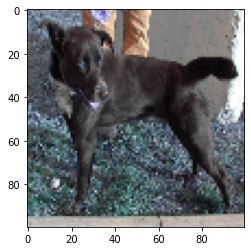

In [44]:
plt.imshow(test_samples[1])